In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot(x, y, title=None):
    plt.figure(figsize=(8, 6))
    if title:
        plt.title(title)
    plt.plot(x, y)

## Прямое и обратное преобразование Фурье

In [3]:
def FFT(signal: np.ndarray):
    assert len(signal.shape) == 1
    n = range(len(signal))
    k = np.reshape(n, newshape=(len(n), 1))
    F = np.exp(complex(real=0,imag=-2) * np.pi * k * n / len(signal))
    return F @ signal #/ len(signal)



def backFFT(coefs: np.ndarray):
    assert len(coefs.shape) == 1
    n = range(len(coefs))
    k = np.reshape(n, newshape=(len(n), 1))
    F = np.exp(complex(real=0,imag=2) * np.pi * k * n / len(coefs))
    return F @ coefs / len(coefs)

## Функция для удобства перехода в частотное пространство

In [4]:
def get_frequency_space(time, signal):
    N = len(time)
    dt = time[1] - time[0]
    coefs = FFT(signal)
    amplitude = np.abs(coefs[:len(coefs)//2])
    freq = np.linspace(0.0, 1//(2.0*dt), N//2)
    return freq, amplitude, coefs

## Проверим функции: перейдем в частотное пространство и обратно

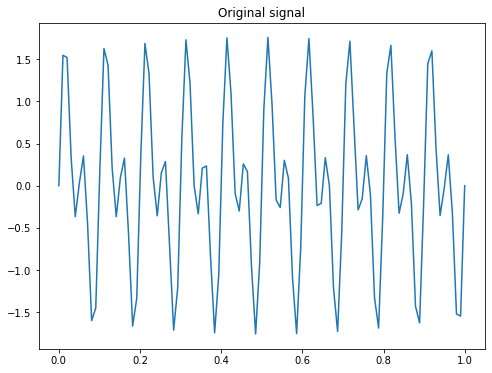

In [5]:
t = np.linspace(0, 1, 100)
y = np.sin(2 * np.pi * 20 * t) + np.sin(2 * np.pi * 10 * t)
plot(t, y, title='Original signal')

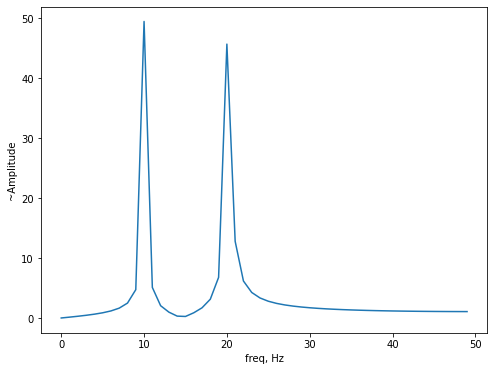

In [6]:
freq, amplitude, coefs = get_frequency_space(t, y)
plot(freq, amplitude)
plt.ylabel('~Amplitude')
plt.xlabel('freq, Hz');

C norm = 4.529709940470639e-14


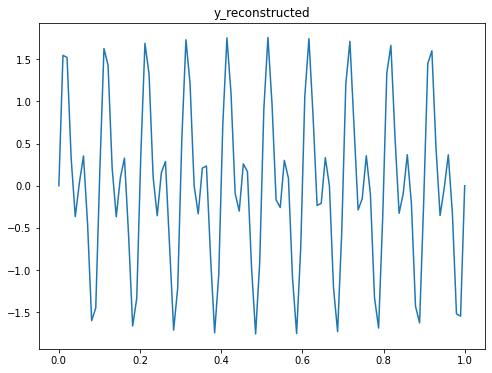

In [7]:
y_reconstructed = np.real(backFFT(coefs))
print(f'C norm = {np.max(np.abs(y_reconstructed - y))}')
plot(t, y_reconstructed, title='y_reconstructed');

# Уберем высокие частоты во временном ряду

In [8]:
# !wget https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip -o data.zip

In [9]:
url = 'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/i/YwKHfqdPTFyFBw'
filename = 'jena_climate_2009_2016.csv'

In [8]:
import urllib.request
urllib.request.urlretrieve(url, filename)

('jena_climate_2009_2016.csv', <http.client.HTTPMessage at 0x1822ea5d490>)

In [70]:
import pandas as pd
df = pd.read_csv(filename)[:1000]
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,07.01.2009 22:00:00,997.11,-9.41,263.97,-10.27,93.4,2.99,2.79,0.20,1.74,2.80,1315.59,0.52,1.38,188.1
996,07.01.2009 22:10:00,997.28,-9.30,264.07,-10.28,92.5,3.01,2.79,0.23,1.74,2.80,1315.27,0.29,1.13,85.4
997,07.01.2009 22:20:00,997.48,-9.89,263.46,-10.96,91.8,2.88,2.64,0.24,1.65,2.65,1318.56,0.29,1.00,119.3
998,07.01.2009 22:30:00,997.58,-10.44,262.90,-11.59,91.2,2.75,2.51,0.24,1.57,2.52,1321.51,0.55,1.00,130.5


#### возьмем первые записи давления или температуры и "сожмем" время на отрезок [0:1]

In [71]:
df['Date Time'] = np.array(i/len(df) for i in range(len(df)))
P_col = 'p (mbar)'
T_col = 'T (degC)'
time_col = 'Date Time'
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,0.0,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,0.001,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,0.002,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,0.003,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,0.004,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


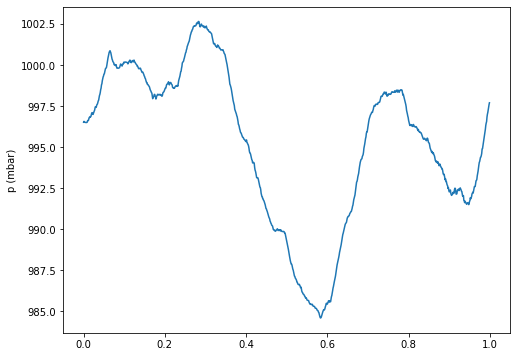

In [76]:
col = P_col
plot(df[time_col], df[col])
plt.ylabel(col);

(0.0, 100.0)

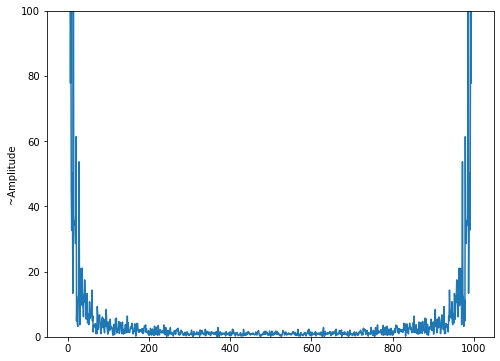

In [78]:
freq, amplitude, coefs = get_frequency_space(df[time_col], df[col])
plt.figure(figsize=(8, 6))
plt.plot(np.abs(coefs))
plt.ylabel('~Amplitude')
plt.ylim([0, 100])

C norm = 1.340829263747537


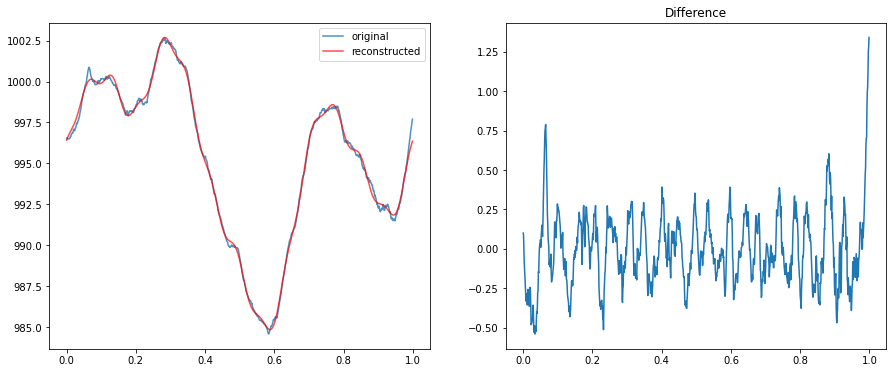

In [87]:
# # coefs_right = coefs[:len(coefs)//2]
# # coefs_new[freq > 400] = 0
# # coefs_new = np.concatenate((coefs_new, coefs_new))
# coefs_new[:len(coefs_new)//2][freq > FREQUENCY_THRESHOLD] = 0 

AMPLITUDE_THRESHOLD  = 70

coefs_new = np.copy(coefs)
coefs_new[np.abs(coefs) < AMPLITUDE_THRESHOLD] = 0

y_reconstructed = np.real(backFFT(coefs_new))
print(f'C norm = {np.max(np.abs(y_reconstructed - df[col]))}')


fig, axs = plt.subplots(1, 2, figsize=(15,6))

axs[0].plot(df[time_col], df[col], label='original', alpha=0.8)
axs[0].plot(df[time_col], y_reconstructed, label='reconstructed', color='red', alpha=0.7)
axs[0].legend()

axs[1].plot(df[time_col], df[col] - y_reconstructed)
axs[1].set_title('Difference');
